# Custom Logistic Regression on Twitter Sentiment Analysis using NLTK Corpus


### Code to run in colab or local PC
Kaggle Link : https://www.kaggle.com/code/ebadurrehmanrashid/sentiment-analysis-using-custom-logist-regression

Github Link : https://github.com/Ebad-urRehman/nlp-projects/blob/master/Tweets_sentiment_analysis using_Custom_logistic_Regression.ipynb

# How to Implement custom logistic regression Tutorial

## Importing files checking versions

## Importing and displaying dataset instances

In [1]:
import nltk
from nltk.corpus import twitter_samples
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
print(len(positive_tweets))
print(len(negative_tweets))
print(len(text))

5000
5000
20000


In [2]:
print('\n'.join(negative_tweets[:5]))

hopeless for tmr :(
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
@Hegelbon That heart sliding into the waste basket. :(
“@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too
Dang starting next week I have "work" :(


In [3]:
print('\n '.join(text[:5]))


RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP
 VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY
 RT @LabourEoin: The economy was growing 3 times faster on the day David Cameron became Prime Minister than it is today.. #BBCqt http://t.co…
 RT @GregLauder: the UKIP east lothian candidate looks about 16 and still has an msn addy http://t.co/7eIU0c5Fm1
 RT @thesundaypeople: UKIP's housing spokesman rakes in £800k in housing benefit from migrants.  http://t.co/GVwb9Rcb4w http://t.co/c1AZxcLh…


# Preprocessing

In [4]:
# pre-processing
import numpy as np
tweet_tokens_pos = twitter_samples.tokenized('positive_tweets.json')
tweet_tokens_neg = twitter_samples.tokenized('negative_tweets.json')
all_tweets = tweet_tokens_pos + tweet_tokens_neg
labels = np.concatenate((np.ones(len(positive_tweets)), np.zeros(len(negative_tweets))))
print(tweet_tokens_pos[:3])
print(tweet_tokens_neg[:3])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'the', 'waste', 'basket', '.', ':(']]


## Getting stopwords and punctuations

In [7]:
# getting stop words and punctuation
import string
from nltk.corpus import stopwords
stopwords_english = set(stopwords.words('english'))
print('Stop words\n')
print(stopwords_english)
print('\nPunctuation\n')
print(string.punctuation[:10])

Stop words

{'themselves', "we've", 'you', 's', 'was', 'yourselves', 'didn', 'our', 'again', 'ourselves', 'aren', 'his', 'they', 'yours', "we're", 'where', 'am', 'below', "i've", 'from', "they'd", "i'd", 'have', 'being', 'should', 'against', "we'll", 'why', 'here', 'how', "shan't", 'my', 'now', 'be', 'with', 're', 'd', 'them', 'before', "she'll", 'doesn', 'don', 'while', 'will', 'and', 'but', 'nor', 'all', 'herself', 'couldn', 'by', 'been', 'hasn', "he'll", 'their', 'some', 'a', 'shan', "you'll", 'not', 'just', 'off', 'only', "she'd", "couldn't", 'into', 'down', 'o', 'such', "you've", 'so', 'needn', 'there', 'weren', 'if', 'because', "it'll", 'no', 'own', "it's", 'on', 'y', "he'd", "should've", 'for', "doesn't", 'over', 'between', 'she', 'or', 'of', 'to', 'other', "hadn't", "don't", 'him', "that'll", 'through', 'wouldn', "mustn't", 'who', 'in', 'are', 'up', "wouldn't", 'does', 'when', 'once', 'wasn', "they've", 'more', 'shouldn', 'do', 'each', 'then', 'did', 'which', 'about', 'under', 

## Removing stop words and punctuations

In [8]:
# removing stopword and punctuation from tweets, and converting to lowercase
print('\033[92m')
print(all_tweets[:3])
print('\033[94m')
cleaned_tweets = []
for tweet in all_tweets:
    cleaned_tweet = []
    for word in tweet:
        if (word not in stopwords_english and word not in string.punctuation):
            cleaned_tweet.append(word.lower())
    cleaned_tweets.append(cleaned_tweet)
print('removed stop words and punctuation:')
print(cleaned_tweets[:3])


[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!']]

removed stop words and punctuation:
[['#followfriday', '@france_inte', '@pkuchly57', '@milipol_paris', 'top', 'engaged', 'members', 'community', 'week', ':)'], ['@lamb2ja', 'hey', 'james', 'how', 'odd', ':/', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', ':)', 'many', 'thanks'], ['@despiteofficial', 'listen', 'last', 'night', ':)', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland']]


## Dealing with emotes :( :)

In [9]:
# handling emojis and emoticons
# happy emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
# sad emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';(', ':/'
    ])

In [10]:
print('\033[92m')
print(cleaned_tweets[:3])
print('\033[94m')
de_emoteicons_tweets = []
for tweet in cleaned_tweets:
    de_emoteicons_tweet = []
    for index, word in enumerate(tweet):
        if word in emoticons_happy:
            de_emoteicons_tweet.append('happy')
        elif word in emoticons_sad:
            de_emoteicons_tweet.append('sad')
        else:
            de_emoteicons_tweet.append(word)

    de_emoteicons_tweets.append(de_emoteicons_tweet)
print('removed emote icons and replace with sentiments')
print(de_emoteicons_tweets[:3])


[['#followfriday', '@france_inte', '@pkuchly57', '@milipol_paris', 'top', 'engaged', 'members', 'community', 'week', ':)'], ['@lamb2ja', 'hey', 'james', 'how', 'odd', ':/', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', ':)', 'many', 'thanks'], ['@despiteofficial', 'listen', 'last', 'night', ':)', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland']]

removed emote icons and replace with sentiments
[['#followfriday', '@france_inte', '@pkuchly57', '@milipol_paris', 'top', 'engaged', 'members', 'community', 'week', 'happy'], ['@lamb2ja', 'hey', 'james', 'how', 'odd', 'sad', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', 'happy', 'many', 'thanks'], ['@despiteofficial', 'listen', 'last', 'night', 'happy', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland']]


## Dealing with emojies gives less accuracy(due to some mislabeled examples may be)

In [11]:
# # remove emojies using emoji library
# import emoji
# print('\033[92m')
# print(de_emoteicons_tweets[:3])
# print('\033[94m')
# def remove_emoji(text):
#     return emoji.demojize(text).replace(":", "").replace("_", " ")

# no_emoji_tweets = []

# for tweet in de_emoteicons_tweets:
#     no_emoji_tweet = []
#     for word in tweet:
#         no_emoji_tweet.append(remove_emoji(word))
#     no_emoji_tweets.append(no_emoji_tweet)

# print('removed emoji')
# print(no_emoji_tweets[:3])

# commenting this section gives a little bit both performance. 
# it is simple algorithm so it may also lack context so it is better to include that, in most cases

## Removing urls, handles, hashtags etc

In [12]:
# removing twitter handles and emails links etc
print('\033[92m')
print(de_emoteicons_tweets[0])
print('\033[94m')
import re

# for removing handles
handles_pattern = r'@[\w]+'

# for removing links
url_pattern1 = r'https?://[A-Za-z0-9./]+'
url_pattern2 = r'www.[^ ]+'

# for removing emails
email_pattern = r'\S+@\S+'

# for removing hashtags
hashtag_pattern = r'#[\w]+'

# for removing numbers
number_pattern = r'\d+'

de_handle_tweets = []
for tweet in de_emoteicons_tweets:
    de_handle_tweet = []
    for word in tweet:
        word = re.sub(handles_pattern, '', word)
        word = re.sub(url_pattern1, '', word)
        word = re.sub(url_pattern2, '', word)
        word = re.sub(email_pattern, '', word)
        word = re.sub(hashtag_pattern, '', word)
        word = re.sub(number_pattern, '', word)
        de_handle_tweet.append(word) if word != '' else None
    de_handle_tweets.append(de_handle_tweet)
print('removed twitter handles')
print(de_handle_tweets[:3])


['#followfriday', '@france_inte', '@pkuchly57', '@milipol_paris', 'top', 'engaged', 'members', 'community', 'week', 'happy']

removed twitter handles
[['top', 'engaged', 'members', 'community', 'week', 'happy'], ['hey', 'james', 'how', 'odd', 'sad', 'please', 'call', 'contact', 'centre', 'able', 'assist', 'happy', 'many', 'thanks'], ['listen', 'last', 'night', 'happy', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland']]


In [13]:
# checking all tweets once
print('\033[92m')
print(de_handle_tweets[:3])
print('\033[94m')


[['top', 'engaged', 'members', 'community', 'week', 'happy'], ['hey', 'james', 'how', 'odd', 'sad', 'please', 'call', 'contact', 'centre', 'able', 'assist', 'happy', 'many', 'thanks'], ['listen', 'last', 'night', 'happy', 'as', 'you', 'bleed', 'amazing', 'track', 'when', 'scotland']]



# Train test split

In [14]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(de_handle_tweets, labels, test_size=0.2, random_state=42)

# Vectorization using CountVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming X_train and X_test are lists of tokenized words
vectorizer = CountVectorizer()

# Transform the tokenized lists directly (no need for looping and rejoining)
X_train_vectorized = vectorizer.fit_transform([' '.join(tweet) for tweet in X_train])
X_test_vectorized = vectorizer.transform([' '.join(tweet) for tweet in X_test])

# Print shapes of the resulting sparse matrices
print(X_train_vectorized.shape)  # Number of documents x Number of unique words
print(X_test_vectorized.shape)


X_train_array = X_train_vectorized.toarray()
X_test_array = X_test_vectorized.toarray()

# To inspect a specific document's word counts, you can access it like this:
# Get the first document's vector (sparse matrix format)
print(X_train_vectorized[0])  # Sparse matrix format
# If you want to see the word counts (dense format):
print(X_train_vectorized[0].toarray())

# Print the feature names (words corresponding to columns)
print(vectorizer.get_feature_names_out())


(8000, 9341)
(2000, 9341)
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 9341)>
  Coords	Values
  (0, 6977)	1
  (0, 5019)	1
[[0 0 0 ... 0 0 0]]
['__' '___' '__final_final_final' ... 'للعودة' 'ｍｅ' 'ｓｅｅ']


In [16]:
print(X_train_array.shape)
print(X_test_array.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 9341)
(2000, 9341)
(8000,)
(2000,)


In [17]:
print(X_train[:10])
print(X_test[:10])
print(y_train[:10])
print(y_test[:10])


[['sad', 'matt'], ['good', 'thanks', 'anyway', 'happy'], ['bf', 'mean', 'happy'], ['zzzz', 'missed', 'stop', 'sad'], ['means', 'am', 'australia', 'sad'], ['fake', 'i', 'texted', 'sad'], ['this', 'actually', 'made', 'cry', 'disgusting', 'what', 'the', 'actual', 'fuck', 'im', 'disgusted', "i've", 'seen', 'poor', 'people', 'sad'], ["we're", 'sorry', 'google', 'play', 'music', 'currently', 'experiencing', 'errors', 'please', 'try', 'minutes', 'sad'], ['have', 'good', 'match', 'nite', 'boys', 'lets', 'go', 'comp', 'high', 'enjoy', 'happy'], ['after', 'earth', 'happy']]
[['i', 'love', 'feel', 'emm', 'i', 'think', 'sad'], ['thanks', 'guys', 'happy'], ['your', 'love', 'o', 'lord', 'better', 'life', 'happy', 'happy'], ['yeah', 'better', 'use', 'official', 'account', 'happy', 'like', 'the', 'other', '❤', '️'], ['ok', 'good', 'night', 'i', 'wish', 'troye', 'ugly', 'i', 'met', 'today', 'happy', '):', 'ok', 'today', 'fun', "i'm", 'excited', 'tmrw'], ["i'm", 'surprised', 'sounds', 'hellish', 'why', 

# Sigmoid function

In [18]:
# own implementation of logistic regression
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

# number of training examples
m = X_train_array.shape[0]

# number of features
n = X_train_array.shape[1]

# initializing weights and bias
initialize_weights = np.random.randn(n) * 0.01
initialize_bias = 0


## below lines are just for test
z = np.dot(X_train_array, initialize_weights) + initialize_bias
predictions = sigmoid(z) # as X_train is sparse matrix and z to so for calculating sigmoid we need to convert it to dense matrix
print(predictions.shape)
print(predictions[:5])



(8000,)
[0.50073916 0.49037423 0.49816607 0.5014972  0.49756189]


# Compute Gradient, Cost function and Gradient descent

In [20]:
# cost function
def compute_gradients(X, y, y_hat):
    m = y.shape[0] # number of training examples

    dw = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)

    return dw, db


def compute_cost(y, y_hat):
    m = y.shape[0] # number of training examples
    epsilon = 1e-15  # prevent log(0)
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon) # restrict y_hat to avoid log(0)

    cost = (-1/m) * np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))
    return cost

# Gradient Descent
def gradient_descent(X, y, weights, bias, epochs, learning_rate=0.01):
    costs = []
    for i in range(epochs):
        z = np.dot(X, weights) + bias

        y_hat = sigmoid(z)

        cost = compute_cost(y, y_hat)
        dw, db = compute_gradients(X, y, y_hat)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        costs.append(cost)
        if i % 10 == 0:
            print(f"Epoch {i}, Cost: {cost}")
    return weights, bias, costs

# Training the model
epochs = 1000
weights, bias, costs = gradient_descent(X_train_array, y_train, initialize_weights, initialize_bias, epochs, learning_rate=0.01)


Epoch 0, Cost: 0.28318730214608423
Epoch 10, Cost: 0.2808821794568712
Epoch 20, Cost: 0.27861712827310864
Epoch 30, Cost: 0.27639113517437963
Epoch 40, Cost: 0.2742032206930761
Epoch 50, Cost: 0.27205243786529615
Epoch 60, Cost: 0.2699378708582407
Epoch 70, Cost: 0.2678586336692897
Epoch 80, Cost: 0.2658138688922871
Epoch 90, Cost: 0.2638027465468823
Epoch 100, Cost: 0.2618244629670703
Epoch 110, Cost: 0.2598782397453457
Epoch 120, Cost: 0.2579633227291341
Epoch 130, Cost: 0.2560789810663987
Epoch 140, Cost: 0.25422450629752874
Epoch 150, Cost: 0.2523992114908185
Epoch 160, Cost: 0.25060243041902225
Epoch 170, Cost: 0.24883351677464363
Epoch 180, Cost: 0.2470918434217702
Epoch 190, Cost: 0.24537680168240922
Epoch 200, Cost: 0.24368780065541407
Epoch 210, Cost: 0.2420242665662135
Epoch 220, Cost: 0.24038564214567162
Epoch 230, Cost: 0.23877138603651185
Epoch 240, Cost: 0.23718097222583642
Epoch 250, Cost: 0.23561388950236598
Epoch 260, Cost: 0.23406964093710628
Epoch 270, Cost: 0.232547

## Plotting cost function with epochs

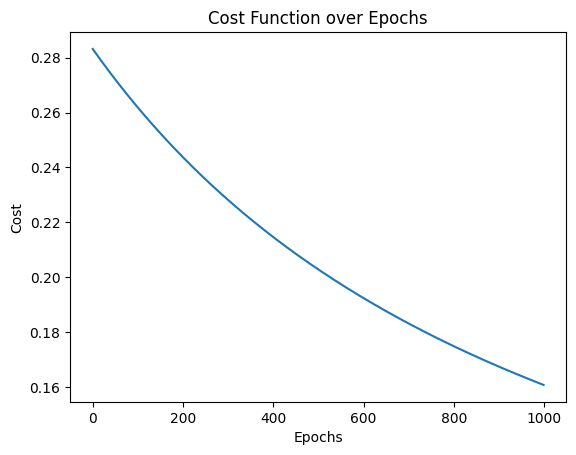

In [21]:
# Plotting the cost function
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs')
plt.show()

## Making predictions on test set

In [22]:
# Making predictions
y_pred_train = sigmoid(np.dot(X_train_array, weights) + bias)
y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
y_pred_test = sigmoid(np.dot(X_test_array, weights) + bias)
y_pred_test = np.where(y_pred_test > 0.5, 1, 0)

## Checking accuracy on test set

In [24]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# Plotting the confusion matrix


Training Accuracy: 0.993375
Test Accuracy: 0.9935
Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4012
         1.0       0.99      1.00      0.99      3988

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

Test Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       988
         1.0       0.99      1.00      0.99      1012

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Training Confusion Matrix:
 [[3967   45]
 [   8 3980]]
Test Confusion Matrix:
 [[ 977   11]
 [   2 1010]]
